In [2]:
import matplotlib.pyplot as plt
import json


In [3]:
file = open('end.json' , 'r')

data = json.load(file)

file

In [4]:
data

{'62': {"{'row-1': [-3.31671382, 3.31671382, 3.31671382], 'row-2': [3.31671382, -3.31671382, 3.31671382], 'row-3': [3.31671382, 3.31671382, -3.31671382]}": {"['(5p1/2)', '(5p3/2)', '(6s1/2)', '(4f5/2)', '(4f7/2)']": {'(0.0, 0.0, 0.0, 3.0, 4.0)': [322.9972721679,
     322.9972721679],
    '(0.0, 0.0, 0.5, 2.5, 4.0)': [219.0695810902, 219.0695810902],
    '(0.0, 0.0, 0.5, 3.0, 3.5)': [219.3031255596, 219.3031255596],
    '(0.0, 0.0, 1.0, 2.0, 4.0)': [109.0704856405, 109.0704856405],
    '(0.0, 0.0, 1.0, 2.5, 3.5)': [109.1412292002, 109.1412292002],
    '(0.0, 0.0, 1.0, 3.0, 3.0)': [109.2106799091, 109.2106799091],
    '(0.0, 0.5, 0.0, 2.5, 4.0)': [311.9097840091, 311.9097840091],
    '(0.0, 0.5, 0.0, 3.0, 3.5)': [312.1172861713, 312.1172861713],
    '(0.0, 0.5, 0.5, 2.0, 4.0)': [128.2292313413, 128.2292313413],
    '(0.0, 0.5, 0.5, 2.5, 3.5)': [128.2090475281, 128.2090475281],
    '(0.0, 0.5, 0.5, 3.0, 3.0)': [128.2002306272, 128.2002306272],
    '(0.0, 0.5, 1.0, 1.5, 4.0)': [105.3959200

In [24]:
def find_min(dic):
    
    
    dic_out = {}
    
    for atom in dic:
        
        min_c = 1000
        
        for bravais in dic[atom]:
            
            for comb in dic[atom][bravais]:
                
                for occ in dic[atom][bravais][comb]:
                    
                    if isinstance(dic[atom][bravais][comb][occ] , float):
                        
                        if dic[atom][bravais][comb][occ] < min_c:
                            
                            min_c = dic[atom][bravais][comb][occ]
                            
                    else:
                        
                        if min(dic[atom][bravais][comb][occ]) < min_c:
                            
                            min_c = min(dic[atom][bravais][comb][occ]    )
                            
                            
                            
                            
                            
        dic_out[atom] = min_c
        
        
    return dic_out
    

In [25]:
min_find = find_min(data)

In [26]:
min_find

{'62': 56.0232118137,
 '82': 4.2051727938,
 '14': 3.9188665721,
 '81': 4.2509997877,
 '85': 3.2250385026,
 '29': 6.0031809588,
 '15': 5.7686103562,
 '27': 5.0561365766,
 '34': 2.6446064115,
 '13': 1.8838896268,
 '50': 2.1952239546,
 '67': 44.9025863637,
 '93': 36.887404123,
 '8': 6.8033079358,
 '91': 9.0067567574,
 '49': 2.1744325552,
 '9': 1.5208944201,
 '6': 24.3383100164,
 '68': 46.4819468016,
 '30': 9.517082564,
 '88': 2.416673408,
 '46': 25.5670792685,
 '64': 22.6993433757,
 '63': 69.9239198335,
 '90': 6.288631403,
 '31': 2.9757656371,
 '2': 0.1097875844,
 '33': 3.8701775932,
 '25': 12.0010915643,
 '87': 1.9829310586,
 '22': 1000,
 '56': 3.6015837335,
 '69': 9.2730427367,
 '71': 4.8562685565,
 '26': 5.8638294187,
 '76': 11.690061659,
 '40': 4.8841011532,
 '77': 11.0248565362,
 '19': 1000,
 '45': 7.9577950272,
 '84': 2.9680200495,
 '78': 12.1785350032,
 '16': 3.6633578459,
 '66': 68.8206551972,
 '43': 9.983695429,
 '5': 5.9909319361,
 '21': 11.1700691562,
 '94': 100.3165398172,
 '2

In [27]:
file2 = open('standard_calc_itmax1.json' , 'r')
stand_data = json.load(file2)

In [38]:
x = []
y1 = []
y2 = []

for atom in min_find:
    
    if atom in stand_data:
        
        x.append(eval(atom))
        
        y1.append( stand_data[atom])
        y2.append( min_find[atom] ) 
        
        
    
    

In [55]:
for i in range(len(x)):
    print(i)
    if (y2[i]-y1[i]) > 0:
        
        del(y2[i])
        del(y1[i])
        del(x[i])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56


In [54]:
len(y2)

57

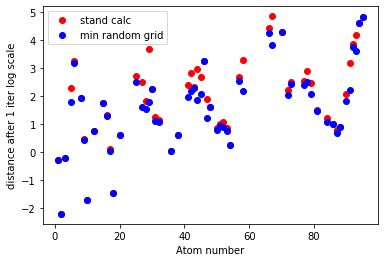

In [58]:


import numpy as np

plt.plot(x , np.log(y1) , 'ro' , label = "stand calc")
plt.plot(x, np.log(y2), 'bo' , label = "min random grid")
plt.xlabel('Atom number')
plt.ylabel('distance after 1 iter log scale')
plt.legend()
plt.savefig('standvsgrid_1.pdf')
plt.show() 




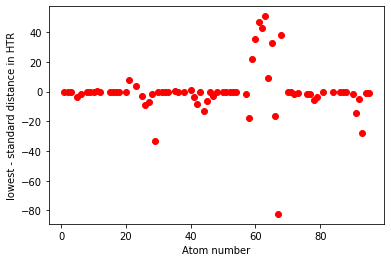

In [43]:
plt.plot(x , np.asarray(y2) - np.asarray(y1) , 'ro')
plt.xlabel('Atom number')
plt.ylabel('lowest - standard distance in HTR')
plt.show()

In [33]:
y.index(min(y))

24

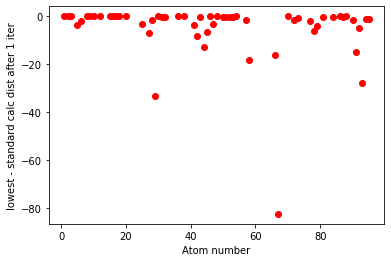

In [57]:
plt.plot(x , np.asarray(y2) - np.asarray(y1) , 'ro')
plt.xlabel('Atom number')
plt.ylabel('lowest - standard calc dist after 1 iter')
plt.savefig('difference_stand_1.pdf')
plt.show()

In [60]:
top4 = []
index = []

for i in range(len(y2)):
    
    if i < 5:
        
        top4.append(y2[i] - y1[i]) 
        index.append(i)
        
    else:
        
        if (y2[i] - y1[i]) < mi:
            
            top4[mindex] = (y2[i] - y1[i])
            
            index[mindex] = i
    
    
    
    
    mi = max(top4)
    mindex = top4.index(mi)
    

In [61]:
print(top4 , index)

[-18.1208776226, -33.2021928889, -82.34025521589999, -16.239979989800005, -27.82849539069999] [52, 1, 5, 24, 6]


In [62]:
for i in index:
    print(x[i])

58
29
67
66
93


In [65]:
for i in index:
    print(y2[i])

8.7138867061
6.0031809588
44.9025863637
68.8206551972
36.887404123
